# Imports

In [1]:
import torch
import platform

import dlc_practical_prologue as dlc

print('Python version <{}>'.format(platform.python_version()))
print('PyTorch version <{}>'.format(torch.__version__))

Python version <3.6.8>
PyTorch version <1.0.1.post2>


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

# Data & Constants

In [3]:
N = 1000
print(f'size of training and test sets = {N}')

train_input, train_target, train_classes,\
test_input, test_target, test_class = dlc.generate_pair_sets(N)
print(f'shape is {train_input.shape}')

size of training and test sets = 1000
shape is torch.Size([1000, 2, 14, 14])


In [4]:
def show_img(img):
    plt.imshow(img)
    plt.show()

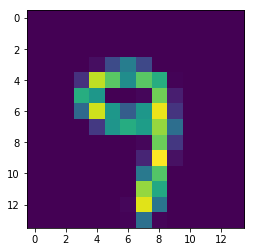

In [5]:
show_img(train_input[0, 0])

# Models

# Training

In [6]:
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as utils
from models import Baseline

my_dataset = utils.TensorDataset(train_input,train_target) # create your datset
my_dataloader = utils.DataLoader(my_dataset, batch_size=128, shuffle=True) # create your dataloader

net = Baseline()
optimizer = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

for epoch in range(25):
    for i, (inputs, labels) in enumerate(my_dataloader):
        labels = labels.type(torch.float)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

print('Finished Training')

Finished Training


In [7]:
def compute_acc(inputs, targets):
    return (((net(inputs) > 0.5).type(torch.long) == targets).sum()).type(torch.float) / len(targets)

In [8]:
test_acc = compute_acc(test_input, test_target)
train_acc = compute_acc(train_input, train_target)
print(f'Train accuracy {train_acc}\tTest accuracy {test_acc}')

Train accuracy 0.8220000267028809	Test accuracy 0.7490000128746033
